# 2 Session : POD

## Exercise 1: Face images

The goal of the exercise is to perform POD on a dataset containing face images
The dataset contains 400 64x64 images of human faces.
How can POD help in reconstructing faces?

In the first cell we import the libraries that we are going to use and the face dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

face_images= fetch_olivetti_faces().images
print(face_images.shape) #check the dimensions

(400, 64, 64)


We can also plot same faces.

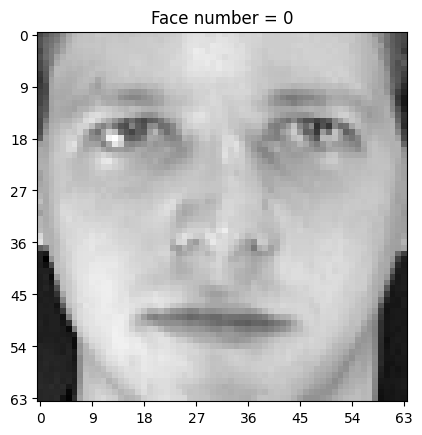

In [2]:
# select the index of the face to show
index = 0

# select the image and reshape it to show it
face = face_images[index,:]
plt.title(f'Face number = {index}')
plt.imshow(face, cmap='grey')
plt.xticks(np.linspace(0, 63, 8))
plt.yticks(np.linspace(0, 63, 8))

plt.show()

 - For convenience, please define the number of images of faces as **Nfaces** and the number of pixeles as **Npix**

 - To be able to apply POD, we need a matrix.
     Please reshape the tensor face_images as a matrix (it will be our "X") and call it **face_X**

In [32]:
Nfaces  = 400
Npix1 = 64
Npix    = Npix1*Npix1
print(f'Nfaces = {Nfaces}')
print(f'Npix   = {Npix}')

face_X = face_images.reshape(Nfaces, Npix).T
print(face_X.shape)

Nfaces = 400
Npix   = 4096
(4096, 400)


##  Implement POD
Now, we write a function to **implement the POD algorithm**. Conventionally, the mean is removed from the dataset before applying POD. If this is not done, the mean will be the first PC.

 - HINT to define POD:
     1. center the matrix X
     2. compute the covariance matrix K = X0.T @ X0
     3. compute the eigendecomposition using np.linalg.eig
     4. sort the eigenvalues using np.sort and np.argsort
     5. compute the POD modes Z = X0 @ Psi
     6. normalize the POD modes phi[i] = z[i]/np.linalg.norm(z[i])

In [20]:
# define the POD function
def POD(X):
  X0 = X - np.mean(X, axis=0)
  K = X0.T @ X0
  eigval, eigvec = np.linalg.eig(K)
  idx = np.argsort(eigval)[::-1]  # Indices of sorted eigenvalues (descending order)
  l = eigval[idx]  # Sorted eigenvalues
  Psi = eigvec[:, idx]
  Z = X0 @ Psi
  Phi = np.zeros_like(Z)
  for i in range(Z.shape[1]):
    Phi[:, i] = Z[:, i] / np.linalg.norm(Z[:, i]) # Normalize each mode

  return Psi, Phi, l  # Return POD modes and eigenvalues


# Uncomment when you have defined the function POD
Psi, Phi, l = POD(face_X)
print(len(np.linspace(1,Npix**2, Npix**2)))

16777216


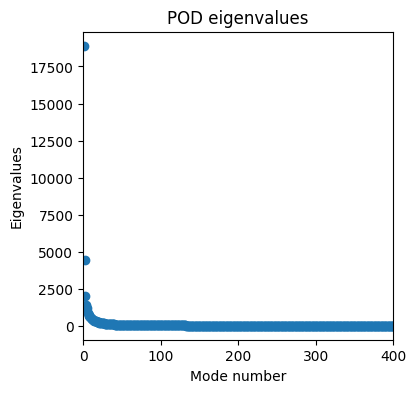

In [23]:
# Uncomment when you have perfomed POD
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(np.linspace(1,400,400), l)
ax.set_title('POD eigenvalues')
plt.xlim([0,400])
plt.xlabel('Mode number')
plt.ylabel('Eigenvalues')
plt.show()

##  Compute POD using the SVD
Now, we can perform POD using the SVD and compute the explained variance as a function of the modes.

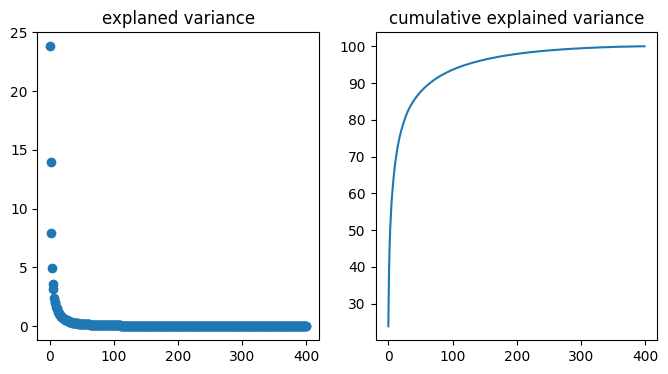

In [30]:
# Use the np.linalg.svd function
mean = np.mean(face_X, axis=1)[:, np.newaxis]
X0 = face_X - mean
Phi, sigma, Psi_t = np.linalg.svd(X0, full_matrices=False)
l = sigma**2

explained_variance_ratio = l/np.sum(l)*100
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].scatter(np.linspace(1,Nfaces,Nfaces),explained_variance_ratio)
axs[0].set_title('explaned variance')
axs[1].plot(np.cumsum(explained_variance_ratio))
axs[1].set_title('cumulative explained variance')
plt.show()

 ##### Show the first eigenfaces.

- Plot the first n=5 eigenfaces.

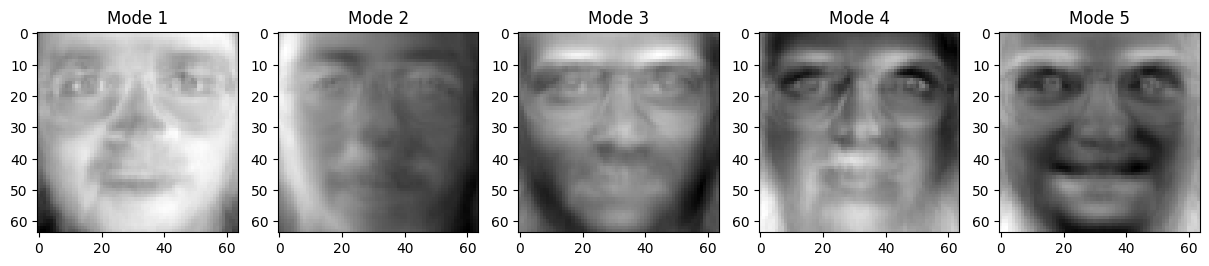

In [33]:
## uncomment this lines to show the eigenfaces:
## We can plot the first 5 modes
n = 5
fig, axs = plt.subplots(1, n, figsize=(3*n, 3))
for i, ax in enumerate(axs):
  ax.imshow(Phi[:, i].reshape(Npix1, Npix1), cmap='grey')
  ax.set_title('Mode ' + str(i+1))


##### Test POD as a reduced-order model (ROM)
We can also check if we can use POD to achieve dimensionality reduction. This means that we can reconstructed the faces using few modes.

- To do:
    1. reconstruct the face number 10 using the first 10 modes, and compare it to the original
    2. reconstruct the same face with 1,5, 10, 100, 200 and 400 modes. Compare the solution
    
    
- #hint: X_reconstructed = mean + Phi_q Aq.T
- #hint: Aq.T = Sigma_q @ Psi_q.T

In [ ]:
At = np.diag(sigma)



for iq in range(0,Nq):


  face_rec = mean.flatten() + Phi[:, :q]@ A[index, :q].T

  axs[iq].

#### Canonical basis vs PCs
Explain what is the difference between using the canonical basis and the mdoes to express the images, and why we can reduce the dimensionality with POD and not with the canonical basis.

##### - Canonical basis
How does this work? In the canonical basis, the image is the sum of some weights multiplied by the canonical basis:
\begin{equation}
    \mathbf{x} = \sum_{i=1}^{m} w_i \mathbf{b}_i
\end{equation}

- To do:
 1. Define the canonical basis $\mathbf{B}=[\mathbf{b}_1, \cdots \mathbf{b}_m]$
 2. Obtain the weights $w_i$ of the first 4 directions (n_basis=4)  $\mathbf{W}=[\mathbf{w}_1, \cdots \mathbf{w}_m]$
 3. Show how the first 4 basis vectors look like ($b_i$)

In [ ]:
## index = ...
## face  = ...

## What are the weights?


##    4. Plot original face VS reconstruction with 100 modes

In [ ]:
## q= 100
## index  = 10

## face_orig =
## face_rec =

## Plot them side by side


#### - POD basis
How does this work? In the POD basis, the image is the sum of some weights multiplied by the POD basis:
\begin{equation}
    \mathbf{x} = \mu(x) + \sum_{i=1}^{m} a_i \boldsymbol{\phi}_i
\end{equation}

- To do:
 1. POD basis already defined: $\boldsymbol{\Phi}=[\boldsymbol{\phi}_1, \cdots \boldsymbol{\phi}_m]$
 2. POD coefficients already known too: $\mathbf{A}=[\mathbf{a}_1, \cdots \mathbf{a}_m]$
 3. Show how the first 4 basis vectors look like.

In [ ]:
## index = ...
## face  = ...

## What are the weights?

## plot of the first 4 basis vectors a_i
